# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


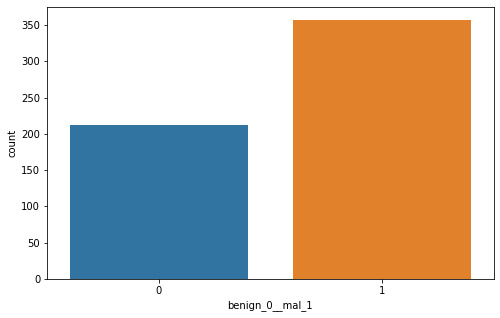

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='benign_0__mal_1', data = df)
plt.show()

In [17]:
# correlation
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

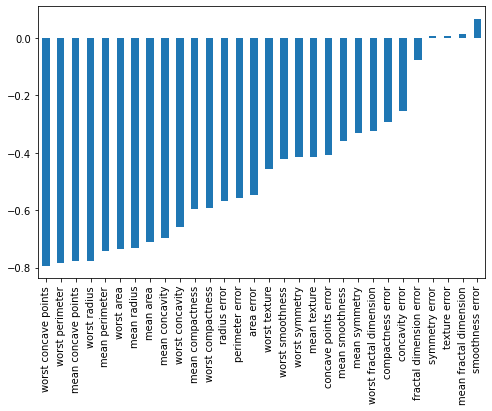

In [21]:
# correlation without benign_0__mal_1
plt.figure(figsize=(8,5))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
plt.show()

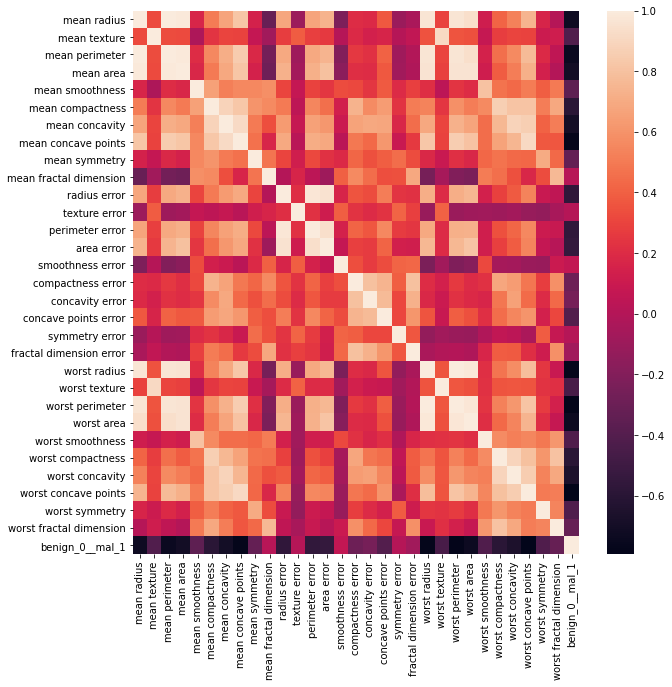

In [13]:
# correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Scaling Data

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
# training and transforming
X_train = scaler.fit_transform(X_train)

In [28]:
# just transforming
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [30]:
X_train.shape

(426, 30)

In [31]:
model = Sequential()

model.add(Dense(units = 30, activation='relu'))
model.add(Dense(units = 15, activation='relu'))

# output layer with sigmoid activate fuction, better to classification problem
model.add(Dense(units = 1, activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [32]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, y=y_train,
          epochs=600,
          validation_data=(X_test,y_test), verbose = 1)

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6799 - val_loss: 0.6630
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6527 - val_loss: 0.6370
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6245 - val_loss: 0.6088
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5949 - val_loss: 0.5757
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5580 - val_loss: 0.5344
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5147 - val_loss: 0.4890
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4695 - val_loss: 0.4437
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4273 - val_loss: 0.3995
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3853 - val_loss: 0.3585
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3502 - val_loss: 0.3242
Epoch 11

In [34]:
# model.history.history

In [41]:
 model_loss = pd.DataFrame(model.history.history)

In [42]:
model_loss.head()

,loss,val_loss
0,0.679943,0.663045
1,0.652657,0.636978
2,0.624507,0.608845
3,0.594887,0.575695
4,0.558004,0.534375


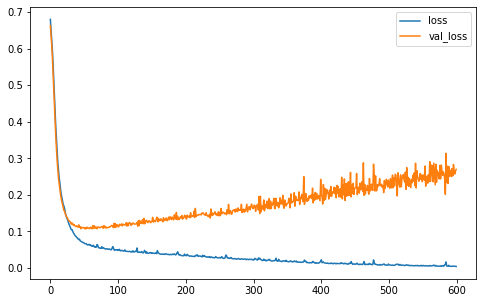

In [44]:
model_loss.plot(figsize = (8,5))
plt.show()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [45]:
# recreating the model
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [47]:
# creating early stop parameter
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [48]:
# training again with early stop parameter
model.fit(x=X_train, y=y_train,
          epochs=600,
          validation_data=(X_test,y_test), verbose = 1,
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6565 - val_loss: 0.6265
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6034 - val_loss: 0.5759
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5516 - val_loss: 0.5224
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5003 - val_loss: 0.4714
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4511 - val_loss: 0.4225
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4044 - val_loss: 0.3754
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3657 - val_loss: 0.3379
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3311 - val_loss: 0.3055
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3031 - val_loss: 0.2789
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2791 - val_loss: 0.2535
Epoch 11/

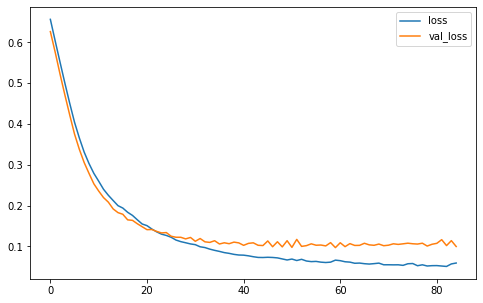

In [52]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(8,5))
plt.show()

## Example Three: Adding in DropOut Layers

In [53]:
from tensorflow.keras.layers import Dropout

In [55]:
# recreating the model
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5)) # 50% chance to dropout or turnoff a neuron 

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [56]:
# training with early stop parameter again
model.fit(x=X_train, y=y_train,
          epochs=600,
          validation_data=(X_test,y_test), verbose = 1,
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.7273 - val_loss: 0.6866
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.7009 - val_loss: 0.6731
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6866 - val_loss: 0.6612
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6674 - val_loss: 0.6482
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6518 - val_loss: 0.6330
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6360 - val_loss: 0.6171
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6213 - val_loss: 0.5997
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6082 - val_loss: 0.5789
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6038 - val_loss: 0.5574
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5730 - val_loss: 0.5357
Epoch 11

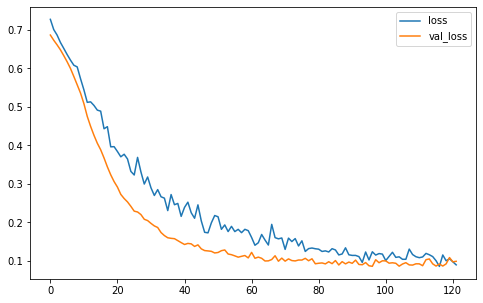

In [57]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(8,5))
plt.show()

# Model Evaluation

In [59]:
# classification prediction
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [69]:
# testing predictions in another way
predictions_2 = (model.predict(X_test) > 0.5).astype("int32")

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [66]:
# we only get 1 False Negative and 3 False Positive
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]


In [70]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions_2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [71]:
# we only get 1 False Negative and 3 False Positive
print(confusion_matrix(y_test, predictions_2))

[[54  1]
 [ 3 85]]
